In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


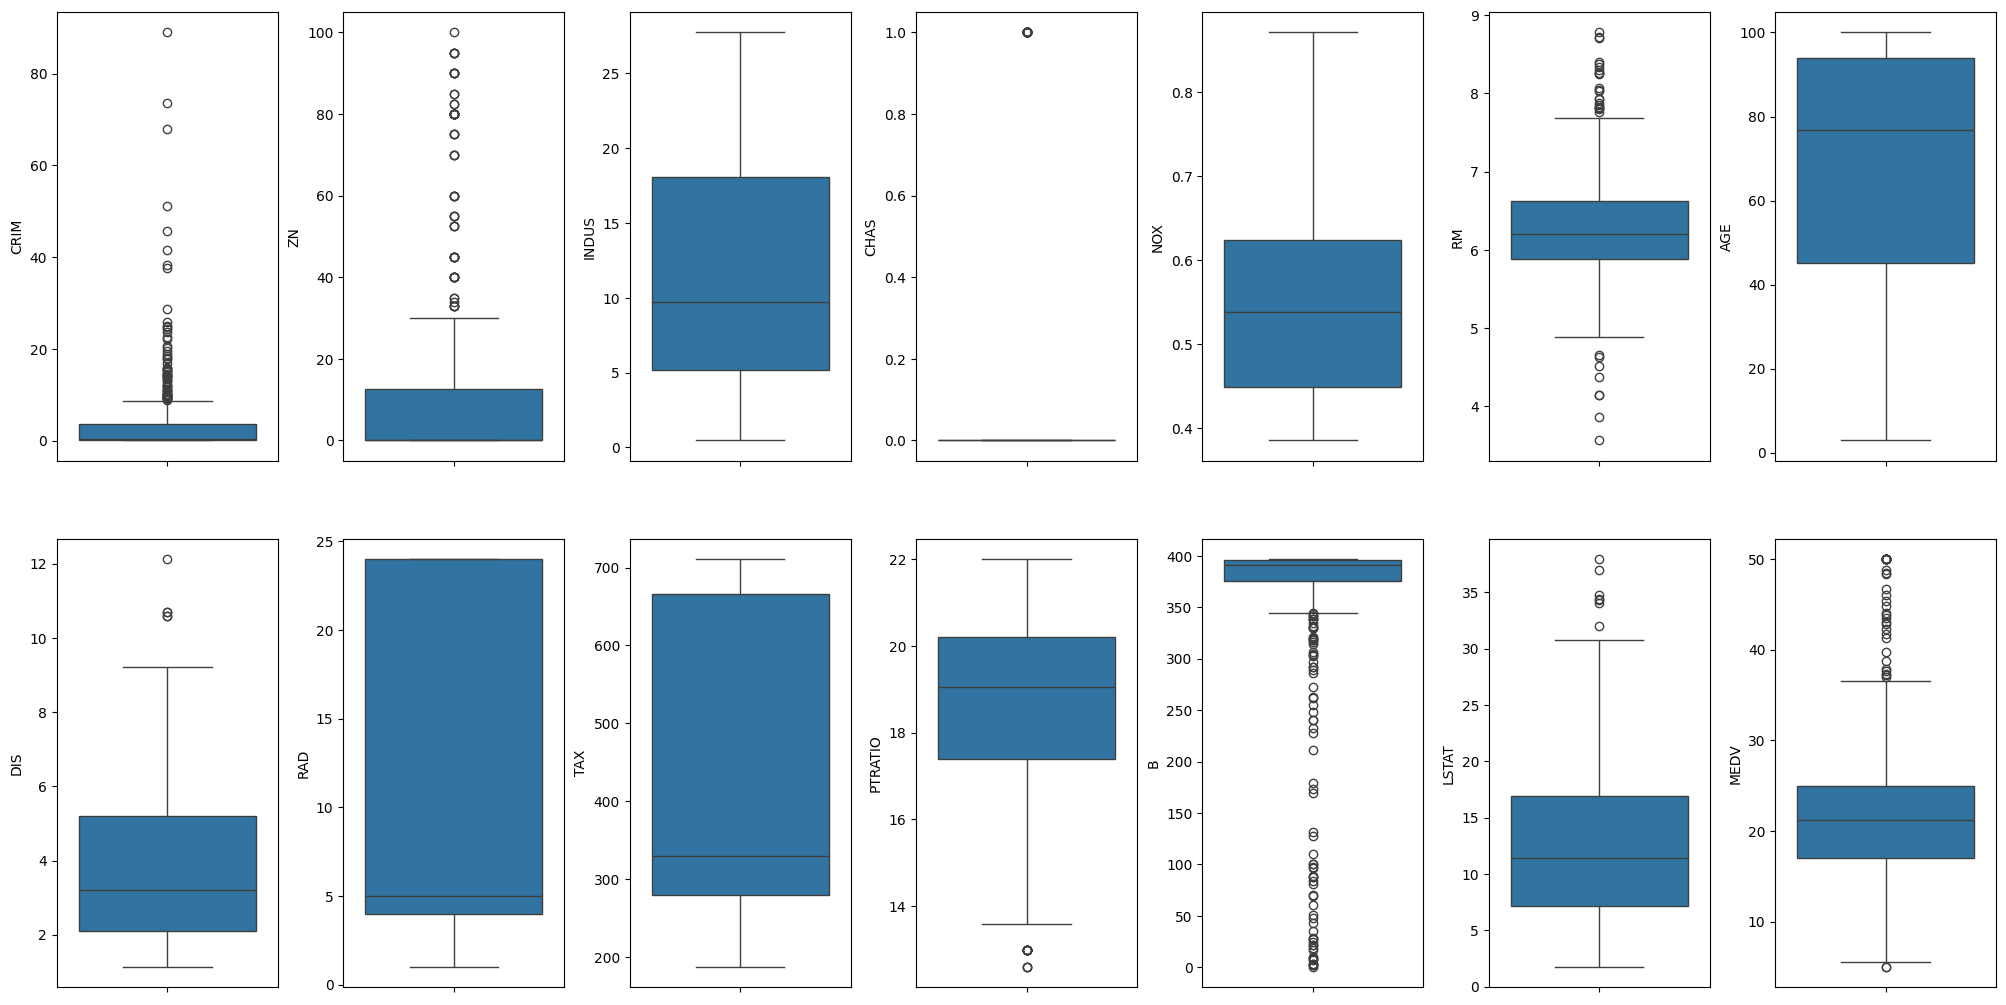

In [ ]:
#create box plots
fig, ax =plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

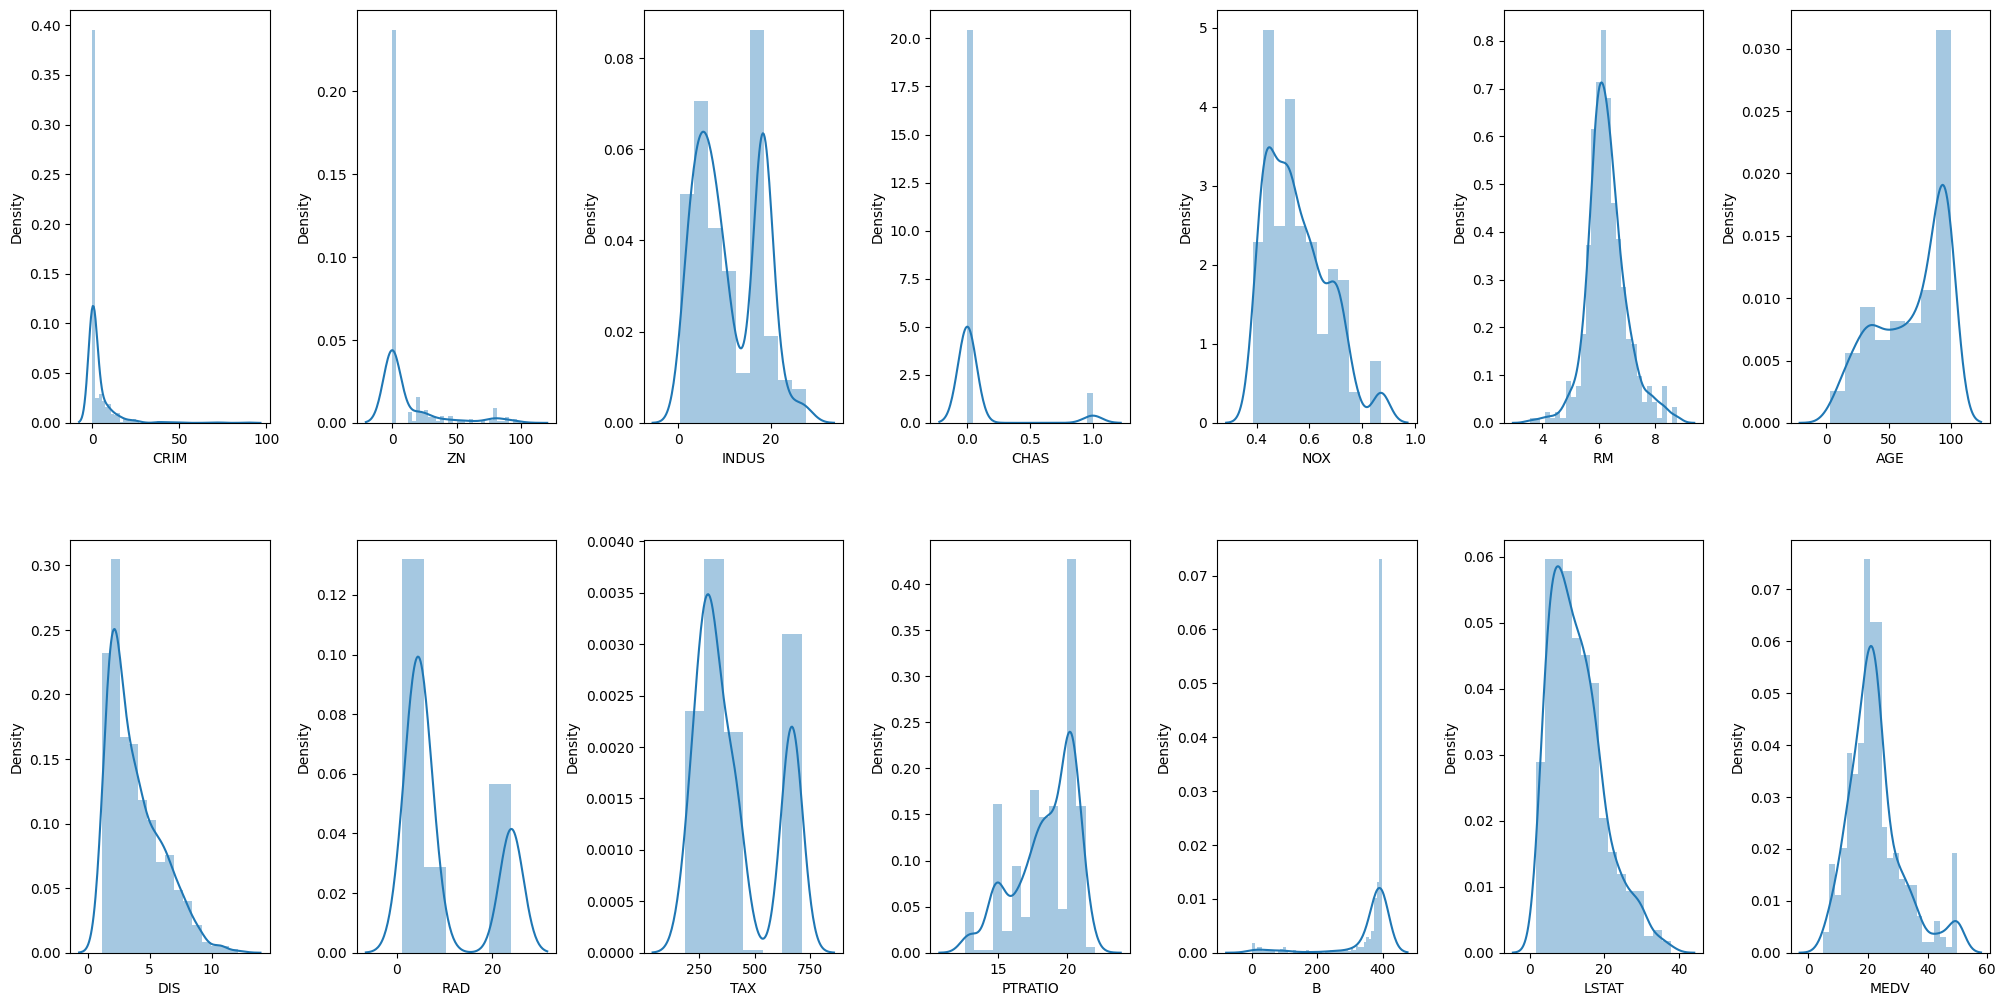

In [ ]:
#create dist plot
fig, ax =plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

##MIN-MAX normalization

In [ ]:
cols = ['CRIM', 'ZN', 'TAX', 'B']
for col in cols:
   minimum = min(df[col])
   maximum = max(df[col])
   df[col] = (df[col] - minimum) /(maximum - minimum)

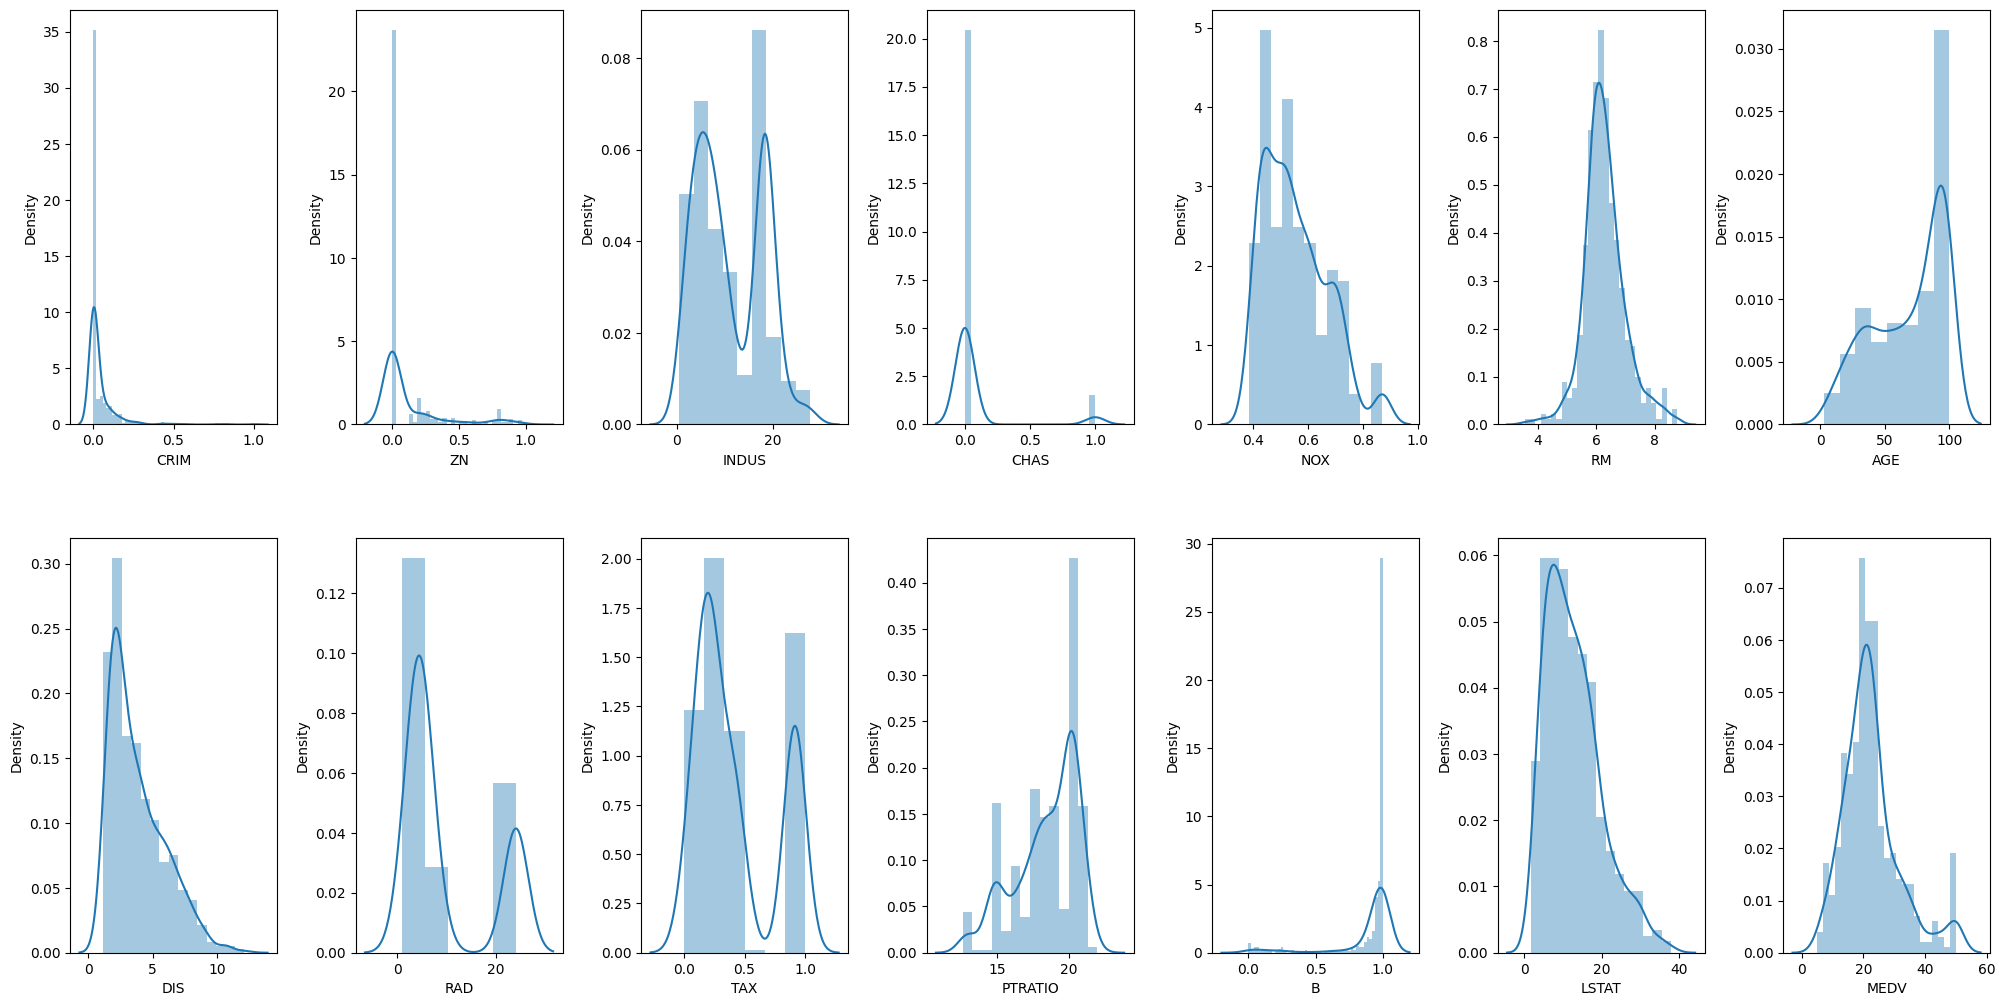

In [ ]:
fig, ax =plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
#Standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

#fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,CRIM,ZN,TAX,B
0,-0.413898,0.290525,-0.666608,0.441052
1,-0.411488,-0.479864,-0.987329,0.441052
2,-0.411491,-0.479864,-0.987329,0.396427
3,-0.410908,-0.479864,-1.106115,0.416163
4,-0.406697,-0.479864,-1.106115,0.441052


In [ ]:
for col in cols:
  df[col] = scaled_cols[col]

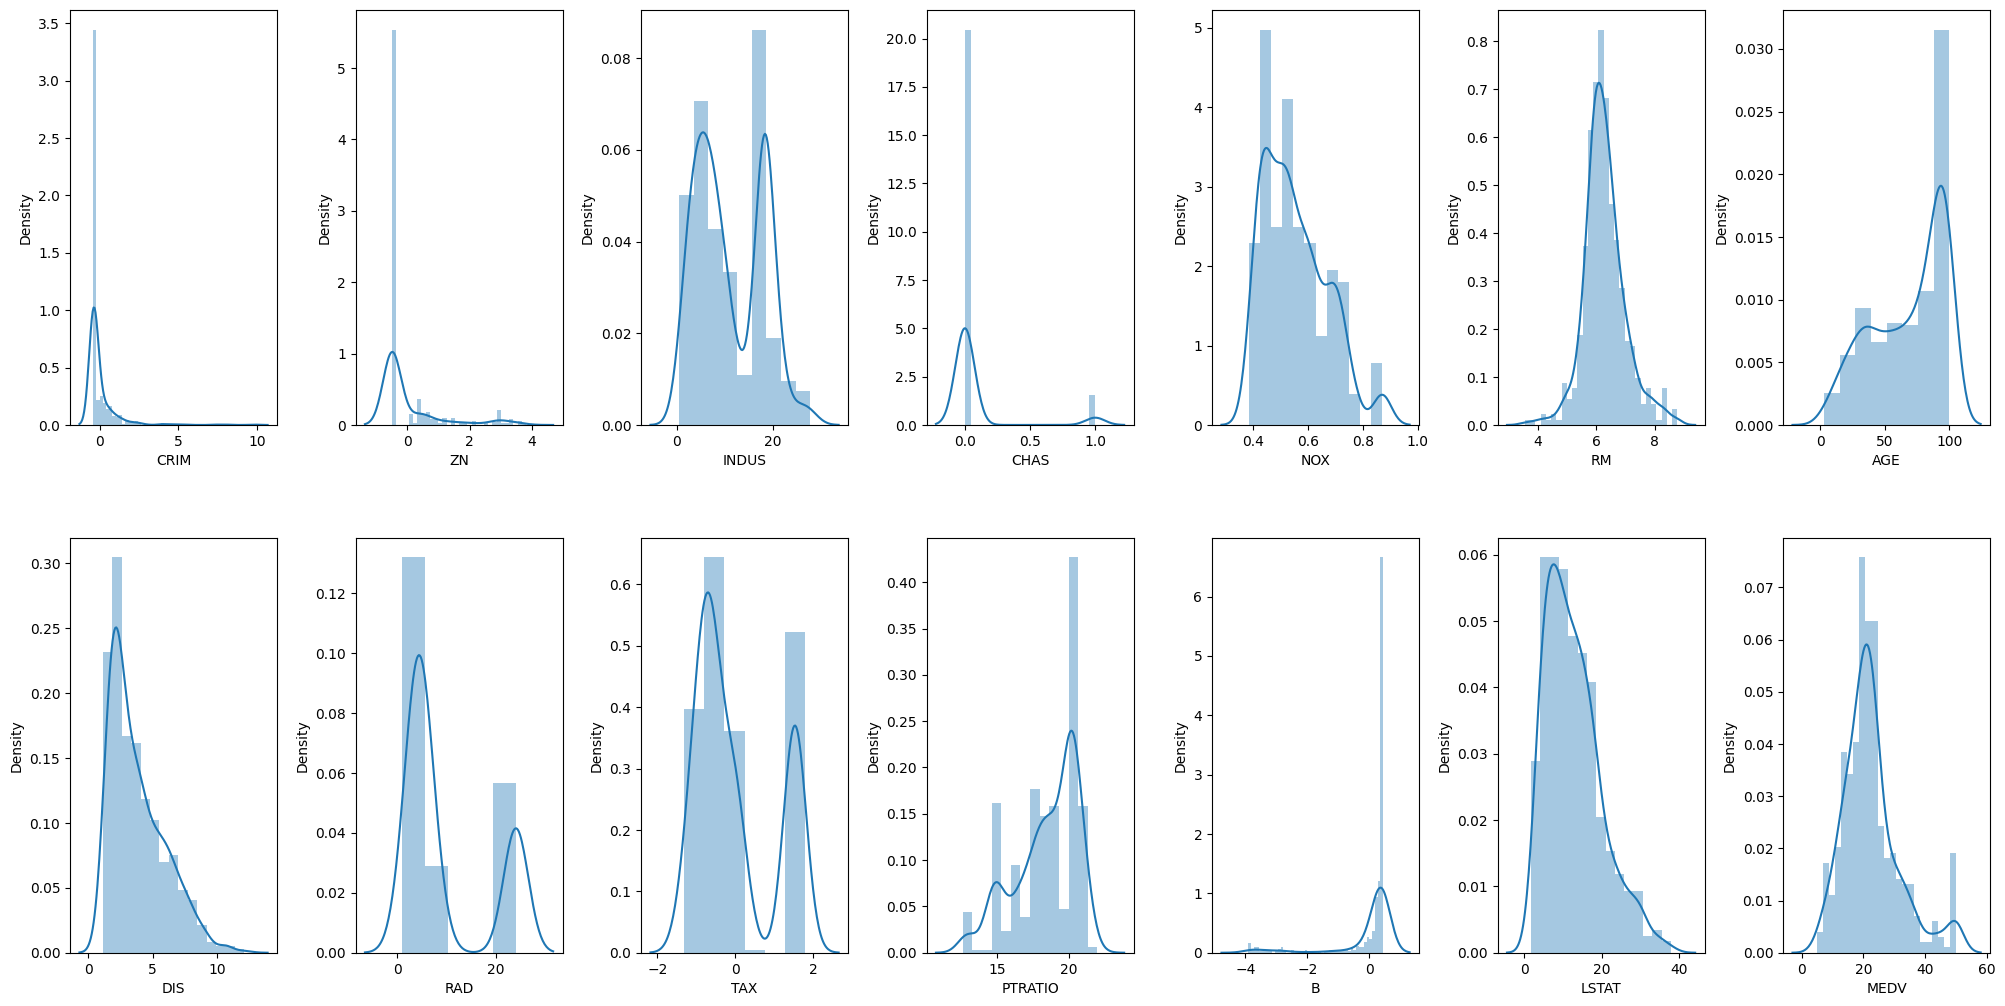

In [ ]:
fig, ax =plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Coorelation matrix

<Axes: >

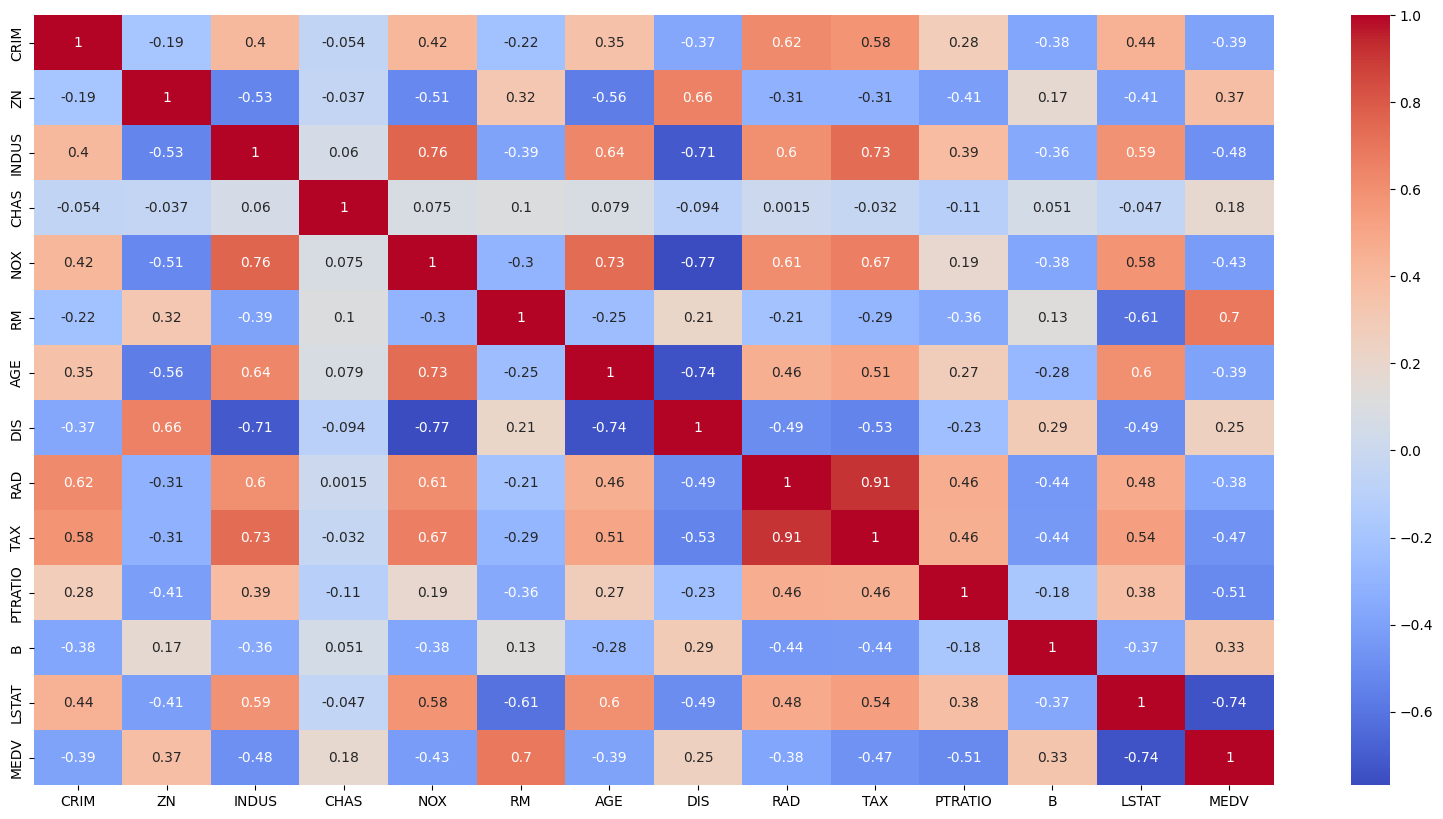

In [ ]:
corr = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')


<Axes: xlabel='LSTAT', ylabel='MEDV'>

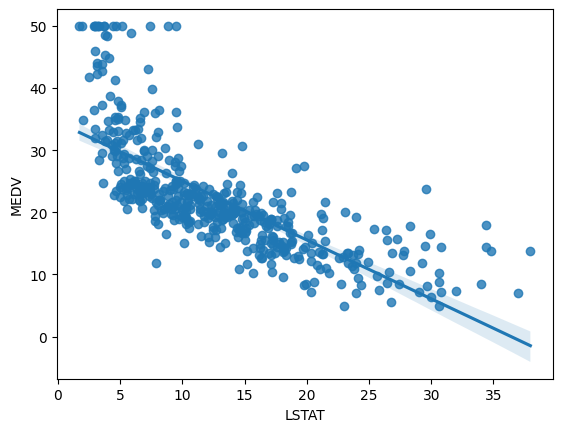

In [ ]:
sns.regplot(y=df['MEDV'], x=df['LSTAT'])

<Axes: xlabel='RM', ylabel='MEDV'>

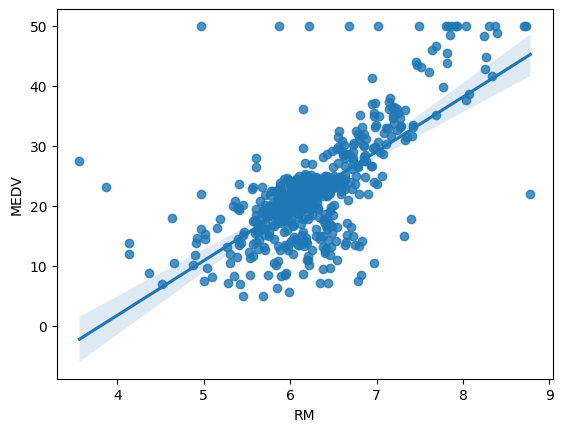

In [ ]:
sns.regplot(y=df['MEDV'], x=df['RM'])

Input Split

In [ ]:
x = df.drop(columns=['MEDV', 'RAD'], axis=1)
y = df['MEDV']

Model Training

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
  #train the model
  x_train, x_test, y_train, y_test =train_test_split(x, y, random_state=42)
  model.fit(x_train, y_train)

  #predict the training set
  pred = model.predict(x_test)

  #perform cross_validation
  cv_score = cross_val_score(model, x, y, scoring= 'neg_mean_squared_error', cv=5)
  cv_score = np.abs(np.mean(cv_score))

  print("Model report")
  print("MSE", mean_squared_error(y_test, pred))
  print("CV Score", cv_score)

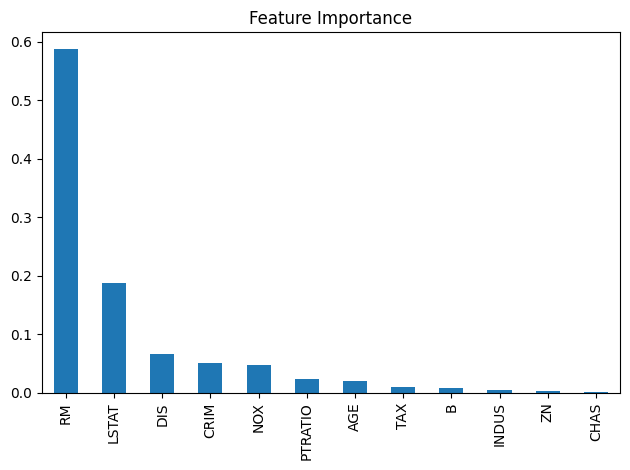

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Initialize and train the model
model = DecisionTreeRegressor()
model.fit(x, y)

# Get and plot feature importances
coef = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')
plt.tight_layout()
plt.show()


Model report
MSE 20.674015748031504
CV Score 40.14560609590371


<Axes: title={'center': 'Feature Importance'}>

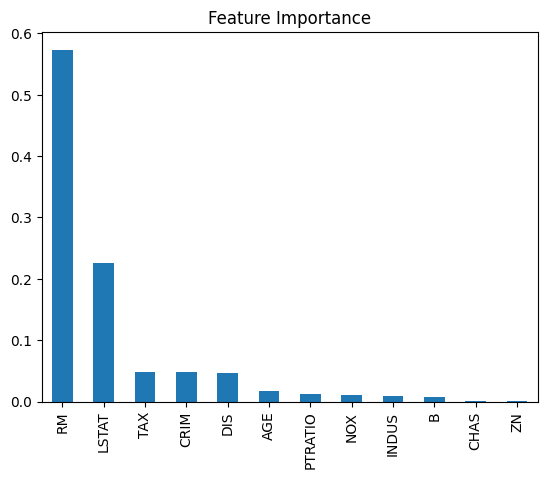

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Model report
MSE 11.036829685039374
CV Score 21.779310844476782


<Axes: title={'center': 'Feature Importance'}>

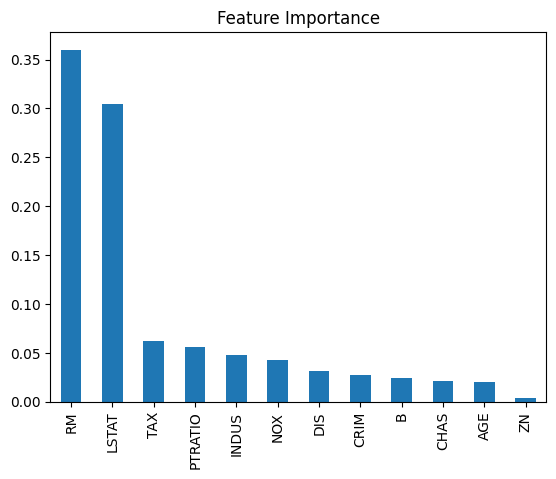

In [ ]:

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Model report
MSE 7.687130297589053
CV Score 25.867771014429742


<Axes: title={'center': 'Feature Importance'}>

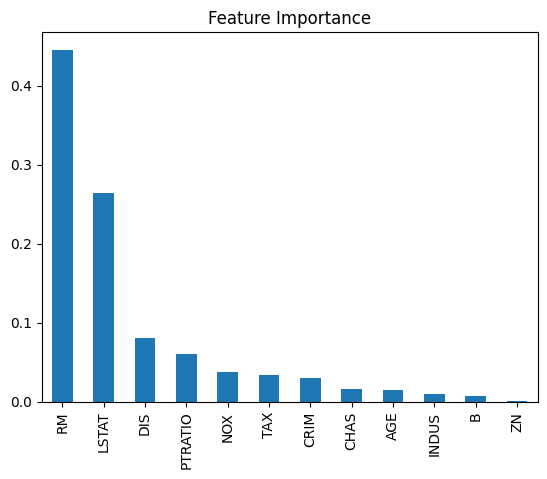

In [ ]:

import xgboost as xgb
model = xgb.XGBRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

In [ ]:
new_data = {
    'CRIM': [0.01], 'ZN': [15.0], 'INDUS': [2.0], 'CHAS': [0.0], 'NOX': [0.4],
    'RM': [6.0], 'AGE': [50.0], 'DIS': [4.5], 'TAX': [250.0], 'PTRATIO': [17.0],
    'B': [380.0], 'LSTAT': [5.0]
}

new_df = pd.DataFrame(new_data)

# Impute missing values in the new data using the means from the training data
# This is important if your new data might have missing values in the same columns as the training data
new_df.fillna(x.mean(), inplace=True)

# Scale the new data using the same scaler that was used for the training data
# We need to re-fit the scaler on the original data 'x' which was used for training,
# to ensure consistent scaling.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x) # Re-fit the scaler on the training data
new_data_scaled = scaler.transform(new_df) # Transform the new data using the fitted scaler


# Make a prediction
predicted_price = model.predict(new_data_scaled)

print(f"The predicted price is: ${predicted_price[0]:.2f}")

The predicted price is: $43.57
